In [23]:
## Declarations
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##
numCol = 10
numRow = 7
ActionList = ['u','d','r','l'] # 0,1,2,3

def StateToCordinate(state):
    x = state % numCol
    y = state // numCol
    return x,y

def CordToState(x,y):
    return x + (numCol * y)

rewardLoc = CordToState(7,3)
startLoc = CordToState(0,3)

In [3]:
## Windy Gridworld
WindList = [0,0,0,1,1,1,2,2,1,0]

In [4]:
def windGrid(state,action):
    x,y = StateToCordinate(state)
    wind = WindList[x]
    if action == 0:
        y += 1
    if action == 1:
        y -= 1
    if action == 2:
        x += 1
    if action == 3:
        x -= 1
    
    y += wind
    
    ## Normalise
    if x < 0:
        x = 0
    if y < 0:
        y = 0
    if x >=numCol:
        x = numCol - 1
    if y >=numRow:
        y = numRow - 1
    
    nextState = CordToState(x,y)
#     print(x,y)
    reward = -1
    return nextState,reward

In [5]:
def chooseAction(state,Q,epsilon):
    e = np.random.uniform()
    possibleAction = []
    x,y = StateToCordinate(state)
    if y < numRow-1:
        possibleAction.append(0)
    if y > 0:
        possibleAction.append(1)
    if x < numCol - 1:
        possibleAction.append(2)
    if x > 0:
        possibleAction.append(3)
    # sort according to Q value in increasing order
    possibleAction  = sorted(possibleAction , key = lambda x : Q[state,x])

    if e < epsilon:
        ## Greedy
        return np.random.choice(possibleAction)
    else:
        return possibleAction[-1]

In [19]:
## Sarsa
def Sarsa(algo,ActionList , chooseAction , numEpisode = 200 , numSeed = 10):

    ## Declarations
#     numEpisode = 200
    Elist = [0]*numEpisode
#     numSeed = 10
    alpha = 0.5
    epsilon = 0.1
    gamma = 1
    numState = numCol * numRow
    numAction = len(ActionList)

    for seed in range(numSeed):
        # Q = -1 * np.random.uniform(size = [numState , numAction])
        # for i in range(numAction):
        #     Q[rewardLoc , i] = 0
        Q = np.zeros([numState , numAction])
        np.random.seed(seed+1)
        ## Algorithm
        for e in range(numEpisode):
            ts = 1
            state = startLoc
            action = chooseAction(state,Q,epsilon)
            while(state != rewardLoc):
                nextState , reward = algo(state,action)
                nextAction = chooseAction(nextState,Q,epsilon)
                ## Update
                Q[state,action] = Q[state,action] + alpha * (reward + gamma * Q[nextState,nextAction] - Q[state,action])
                ## Loop
                state = nextState
                action = nextAction
                ts += 1
            Elist[e] += ts

    for e in range(numEpisode):
        Elist[e] = Elist[e] // numSeed
    return Elist

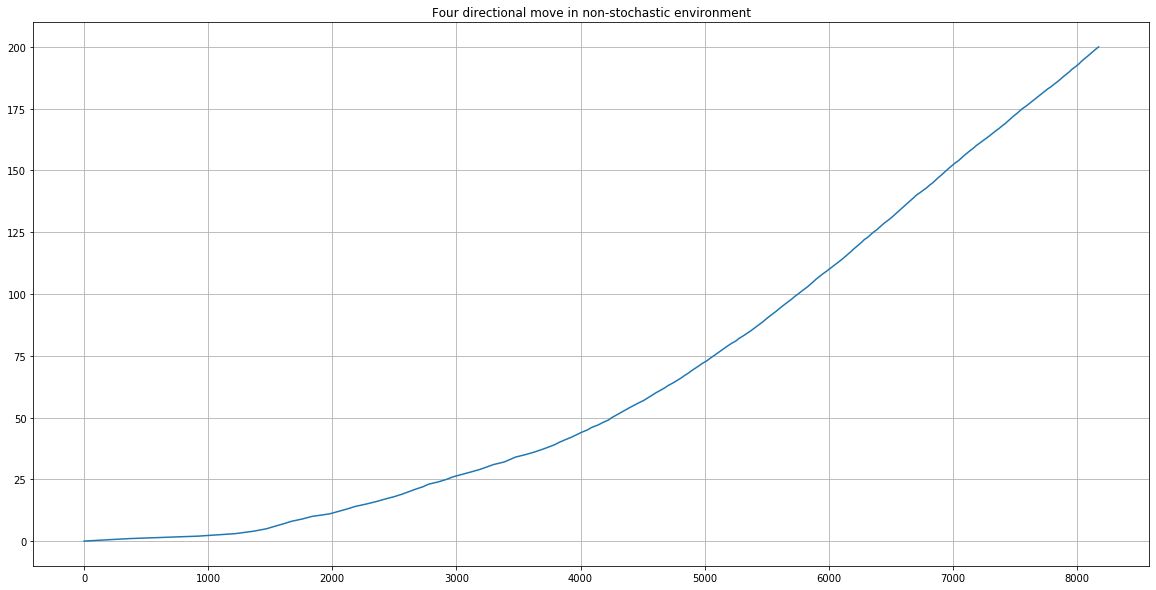

In [43]:
# Run1
Elist = Sarsa(windGrid,ActionList,chooseAction)
fig = plt.figure(figsize=(20,10))
plt.title("Four directional move in non-stochastic environment")
plt.plot([0] + list(np.cumsum(np.array(Elist))),[0] + list(range(1 , len(Elist)+1)))
plt.grid(True)
plt.show()

In [35]:
## 8-grid
Action8 = [0,1,2,3,4,5,6,7]
def grid8(state,action,stochastic):
#     print(stochastic)
    x,y = StateToCordinate(state)
    wind = WindList[x]
    if action == 0:
        y += 1
    if action == 1:
        y -= 1
    if action == 2:
        x += 1
    if action == 3:
        x -= 1
    if action == 4:
        y += 1
        x += 1
    if action == 5:
        y -= 1
        x += 1
    if action == 6:
        y += 1
        x -= 1
    if action == 7:
        y -= 1
        x -= 1
    
    
    y += wind
    if stochastic:
        l = np.random.uniform()
        if l < 1.0/3:
            y -= 1
#             print("wind -")
        elif l < 2.0/3:
            y += 1
#             print("wind +")

    ## Normalise
    if x < 0:
        x = 0
    if y < 0:
        y = 0
    if x >=numCol:
        x = numCol - 1
    if y >=numRow:
        y = numRow - 1
    
    nextState = CordToState(x,y)
#     print(x,y)
    reward = -1
    return nextState,reward

def chooseAction8(state,Q,epsilon):
    e = np.random.uniform()
    possibleAction = []
    x,y = StateToCordinate(state)
    if y < numRow-1:
        possibleAction.append(0)
    if y > 0:
        possibleAction.append(1)
    if x < numCol - 1:
        possibleAction.append(2)
    if x > 0:
        possibleAction.append(3)
    if (y < numRow-1) and (x < numCol - 1):
        possibleAction.append(4)
    if (y > 0) and (x < numCol - 1):
        possibleAction.append(5)
    if (y < numRow-1) and (x > 0):
        possibleAction.append(6)
    if (y > 0) and (x > 0):
        possibleAction.append(7)
    
    # sort according to Q value in increasing order
    possibleAction  = sorted(possibleAction , key = lambda x : Q[state,x])

    if e < epsilon:
        ## Greedy
        return np.random.choice(possibleAction)
    else:
        return possibleAction[-1]


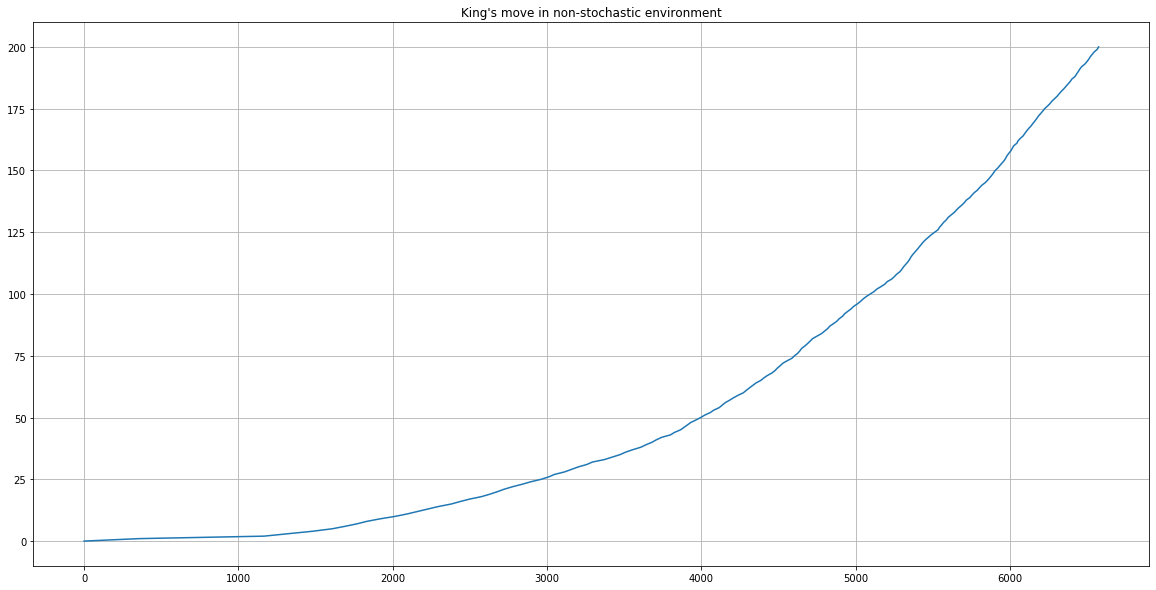

In [44]:
# Run1
def run2grid(state,action):
    return grid8(state,action,False)
Elist = Sarsa(run2grid,Action8,chooseAction8)
fig = plt.figure(figsize=(20,10))
plt.title("King's move in non-stochastic environment")
plt.plot([0] + list(np.cumsum(np.array(Elist))),[0] + list(range(1 , len(Elist)+1)))
plt.grid(True)
plt.show()

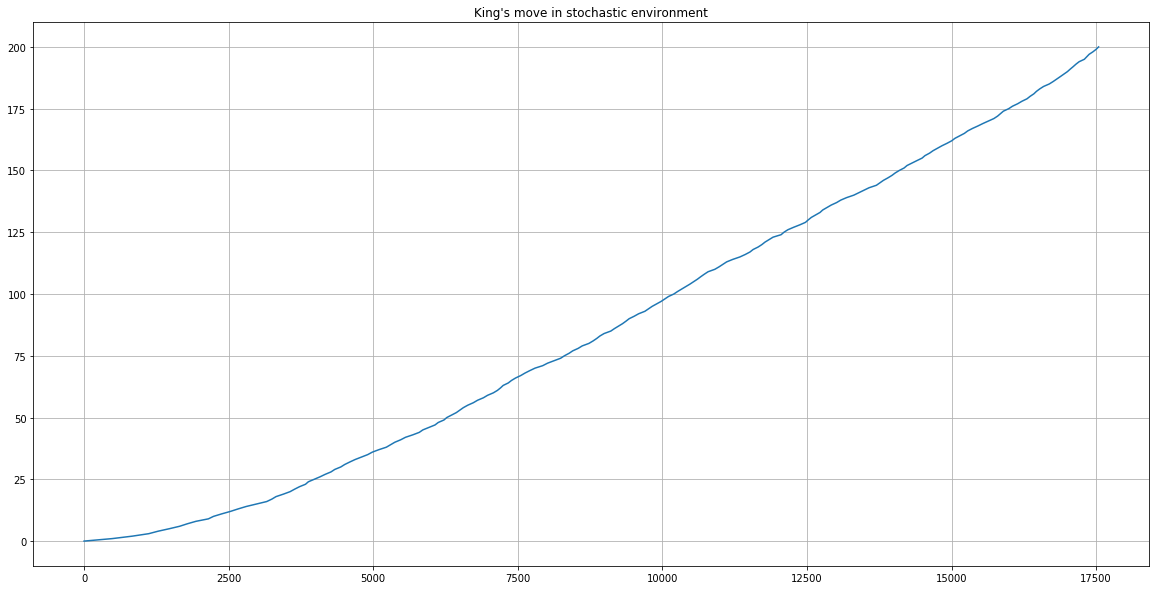

In [45]:
## Run3
def run3grid(state,action):
    return grid8(state,action,True)
Elist = Sarsa(run3grid,Action8,chooseAction8,numEpisode = 200)
fig = plt.figure(figsize=(20,10))
plt.title("King's move in stochastic environment")
plt.plot([0] + list(np.cumsum(np.array(Elist))),[0] + list(range(1 , len(Elist)+1)))
plt.grid(True)
plt.show()